# This is a continuation of my Rent Burden Analysis

## Research Question: How have BART's TOD projects in Alameda County changed surrounding neighborhoods, in regards to ethnic make-up and rent burden?

### Chaithra and I will be completing different analyses for our midterm submission. I will be working on Rent Burden Analysis. I have produced an assembly of maps as well as two charts (one being an improvement of the other). Chaithra will provide the other chart and mapping requirements of the midterm.

### In this notebook:
I ran out of room on my previous notebook where I cleaned up my datasets and merged them. So this is where I will make my maps. 

Just to give some context, this data is regarding rent burden. The initial data I downloaded from the census website breaks down each census tract into rent burden categories. Rent burden resembles gross rent as a percentage of household income. I cleaned this data up, combined years 2011 and 2019 (relavent for our comparision), and converted the total raw numbers into percentages. I saved that dataset which is named "rb_comp" in this notebook. For each category (10-14.9%, 15 -19.9%) there is a column for 2011 data and 2019 data. The values inside these columns resemble the percent of people in that census tract that fall under a particular category.

The other dataset I created was to show the percent change in these two years. That dataset is called "rb_pct" in this notebook. If the number is a negative, that means there was a decrease between 2011 and 2019 in the percent of people in a census tract within a particular rent burden category. If there is a positive value, that means there was an increase in the percent of people in a census tract within a particular rent burden category. 

In this notebook, I will try to map these changes. There are two complications; 1. The percent change values are very very small (sometimes even .01 changes). This has proven to be difficult to map. 2. I have not done a statistical analysis to see if the changes are even statistically significant. 

I'll start by importing in my libraries again and loading my files that I cleaned. 

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
rb_pct = gpd.read_file('Alameda_rent_burden_pcnt.geojson')
rb_pct.head()

,GEO_ID,NAME_x,<10%_PercentChange,10 - 14.9%_PercentChange,15 - 19.9%_PercentChange,20 - 24.9%_PercentChange,25 - 29.9%_PercentChange,30 - 34.9%_PercentChange,35 - 39.9%_PercentChange,40 - 49.9%_PercentChange,50% or more_PercentChange,geometry
0,1400000US06001427200,"Census Tract 4272, Alameda County, California",0.393333,0.250633,-0.406250,0.384574,1.985714,1.687143,-0.018333,-0.499667,-0.371223,"POLYGON ((-122.24255 37.76713, -122.24274 37.7..."
1,1400000US06001436200,"Census Tract 4362, Alameda County, California",-0.765200,0.388720,-0.223950,0.491828,-0.107424,-0.710888,-0.124483,-0.236899,0.305866,"POLYGON ((-122.11752 37.66581, -122.11759 37.6..."
2,1400000US06001427100,"Census Tract 4271, Alameda County, California",NaN,-0.289910,-0.126976,-0.220605,0.215634,0.265252,-0.507958,NaN,1.214191,"POLYGON ((-122.23978 37.76608, -122.24013 37.7..."
3,1400000US06001427800,"Census Tract 4278, Alameda County, California",-0.728621,0.515584,-0.176286,0.061262,-0.349516,1.076047,0.003902,-0.576221,0.073517,"POLYGON ((-122.27563 37.77136, -122.27605 37.7..."
4,1400000US06001403300,"Census Tract 4033, Alameda County, California",0.598208,0.565145,0.328889,-0.452520,-0.424640,-0.139718,-0.087191,-0.297840,0.240435,"POLYGON ((-122.25960 37.79624, -122.25966 37.7..."


I see there are Null values, so I'll take care of those.

In [3]:
import numpy as np

In [4]:
rb_pct.replace([np.inf, -np.inf], np.nan, inplace=True)
rb_pct.dropna(inplace=True)
rb_pct.sample(5)

,GEO_ID,NAME_x,<10%_PercentChange,10 - 14.9%_PercentChange,15 - 19.9%_PercentChange,20 - 24.9%_PercentChange,25 - 29.9%_PercentChange,30 - 34.9%_PercentChange,35 - 39.9%_PercentChange,40 - 49.9%_PercentChange,50% or more_PercentChange,geometry
20,1400000US06001451101,"Census Tract 4511.01, Alameda County, California",5.647230,21.857143,-0.404009,1.153413,0.224490,-0.552590,0.561224,-0.014435,-0.538462,"POLYGON ((-121.67707 37.78774, -121.67444 37.7..."
30,1400000US06001403000,"Census Tract 4030, Alameda County, California",3.057238,5.024384,0.355736,2.793781,-0.568307,0.618538,-0.517856,2.901506,0.334102,"POLYGON ((-122.27135 37.79697, -122.27146 37.7..."
136,1400000US06001431200,"Census Tract 4312, Alameda County, California",1.917788,-0.276645,0.079425,-0.277357,2.336671,0.961209,-0.701114,-0.323493,-0.369995,"POLYGON ((-122.09470 37.68934, -122.09455 37.6..."
277,1400000US06001400300,"Census Tract 4003, Alameda County, California",0.364998,0.583611,-0.210460,-0.193071,-0.222470,0.087189,4.611373,-1.000000,-0.352348,"POLYGON ((-122.26124 37.84158, -122.26089 37.8..."
125,1400000US06001407500,"Census Tract 4075, Alameda County, California",-0.300793,0.111279,0.097032,-0.029836,0.028467,-0.786960,-0.638341,1.518696,-0.098969,"POLYGON ((-122.19424 37.76885, -122.19434 37.7..."


In [5]:
rb_pct.to_file("rb_pct.geojson", driver='GeoJSON')

In [6]:
rb_comp = gpd.read_file('alameda_rent_burden.geojson')
rb_comp.head()

,GEO_ID,NAME_x,<10%_2011Percentage,10 - 14.9%_2011_Percentage,15 - 19.9%_2011_Percentage,20 - 24.9%_2011_Percentage,25 - 29.9%_2011_Percentage,30 - 34.9%_2011_Percentage,35 - 39.9%_2011_Percentage,40 - 49.9%_2011_Percentage,...,10 - 14.9%_2019_Percentage,15 - 19.9%_2019_Percentage,20 - 24.9%_2019_Percentage,25 - 29.9%_2019_Percentage,30 - 34.9%_2019_Percentage,35 - 39.9%_2019_Percentage,40 - 49.9%_2019_Percentage,50% or more_2019_Percentage,<10%_2019_Percentage,geometry
0,1400000US06001427200,"Census Tract 4272, Alameda County, California",3.289474,8.662281,16.666667,10.307018,3.070175,3.837719,6.578947,16.447368,...,10.833333,9.895833,14.270833,9.166667,10.312500,6.458333,8.229167,19.166667,4.583333,"POLYGON ((-122.24255 37.76713, -122.24274 37.7..."
1,1400000US06001436200,"Census Tract 4362, Alameda County, California",3.166496,1.940756,10.418795,11.338100,16.138917,10.929520,5.413687,9.499489,...,2.695167,8.085502,16.914498,14.405204,3.159851,4.739777,7.249071,37.081784,0.743494,"POLYGON ((-122.11752 37.66581, -122.11759 37.6..."
2,1400000US06001427100,"Census Tract 4271, Alameda County, California",0.000000,20.545073,20.964361,26.205451,10.691824,4.402516,3.773585,0.000000,...,14.588859,18.302387,20.424403,12.997347,5.570292,1.856764,1.856764,9.283820,4.774536,"POLYGON ((-122.23978 37.76608, -122.24013 37.7..."
3,1400000US06001427800,"Census Tract 4278, Alameda County, California",11.569507,11.031390,16.771300,11.390135,6.636771,7.713004,6.098655,8.520179,...,16.718995,13.814757,12.087912,4.317111,16.012559,6.122449,3.610675,19.544741,3.139717,"POLYGON ((-122.27563 37.77136, -122.27605 37.7..."
4,1400000US06001403300,"Census Tract 4033, Alameda County, California",2.129121,5.013736,9.615385,14.079670,16.414835,12.431319,9.890110,7.417582,...,7.847222,12.777778,7.708333,9.444444,10.694444,9.027778,5.208333,24.791667,3.402778,"POLYGON ((-122.25960 37.79624, -122.25966 37.7..."


rb_comp has the actual percentages for both 2011 and 2019, not the percent change. This might be useful to make charts or before and after graphs.

I'm going to explore the percent change data and see which groups I should try to map.

In [7]:
rb_pct['40 - 49.9%_PercentChange'].describe()

count    147.000000
mean       0.547979
std        1.695241
min       -1.000000
25%       -0.383357
50%        0.091176
75%        0.914625
max       13.139610
Name: 40 - 49.9%_PercentChange, dtype: float64

In [8]:
rb_pct['30 - 34.9%_PercentChange'].describe()

count    147.000000
mean       0.447120
std        1.540302
min       -1.000000
25%       -0.365514
50%       -0.016430
75%        0.644485
max       10.453468
Name: 30 - 34.9%_PercentChange, dtype: float64

In [9]:
rb_pct['50% or more_PercentChange'].describe()

count    147.000000
mean       0.013477
std        0.502948
min       -0.801338
25%       -0.301125
50%       -0.098969
75%        0.177543
max        2.703059
Name: 50% or more_PercentChange, dtype: float64

In [10]:
rb_pct_webmercator = rb_pct.to_crs(epsg=3857)

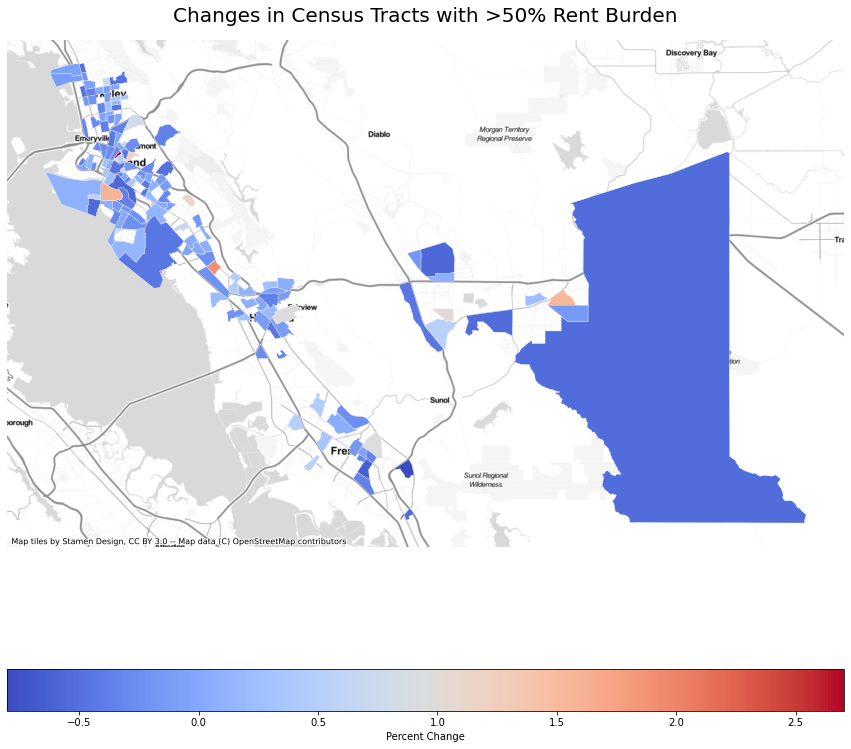

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))

rb_pct_webmercator.plot(column='50% or more_PercentChange',
                              cmap='coolwarm',
                              ax=ax,
                        edgecolor='white',
                        linewidth=0.3,
                        legend=True,
                        legend_kwds={'label': 'Percent Change','orientation': "horizontal"}
)
ax.axis('off')
ax.set_title('Changes in Census Tracts with >50% Rent Burden',fontsize=20,pad=18)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite) 

Alright! Not too shabby, but also not very clear. There are lot of census tracts with negative changes and very few with positive changes. However, I do notice that one very clear census tract with positive change is pretty close to where our BART stations are. 


Now I'm going to make some comparison side-by-side maps.

Text(0.5, 1.0, '2019 Rent Burden >50%')

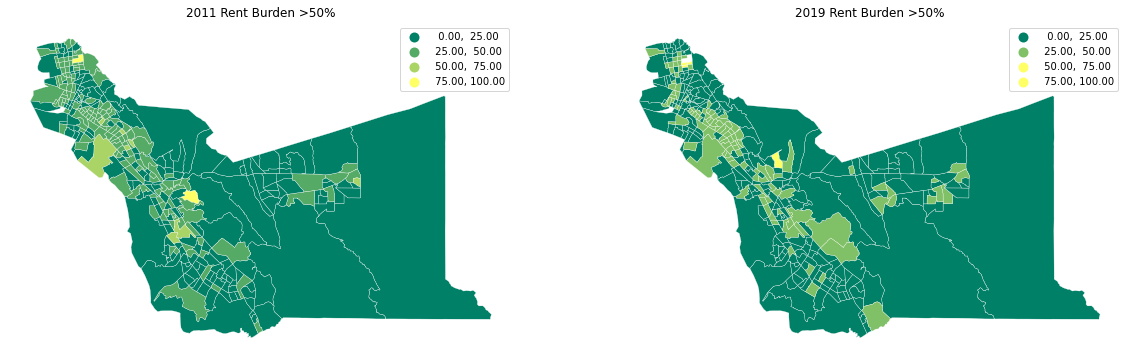

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(20, 15), sharex=True, sharey=True)
ax1, ax2 = axs
rb_comp.plot(column='50% or more_2011_Percentage',
             cmap='summer',
           scheme='user_defined',
            classification_kwds={'bins':[25,50,75,100]},
            edgecolor='white', 
            linewidth=0.3, 
            ax=ax1, 
            legend=True
           )
ax1.axis("off")
ax1.set_title("2011 Rent Burden >50%")

rb_comp.plot(column='50% or more_2019_Percentage',
             cmap='summer',
            scheme='user_defined',
            classification_kwds={'bins':[25,50,75,100]},
            edgecolor='white', 
            linewidth=0.3, 
            ax=ax2, 
            legend=True
           )
ax2.axis("off")
ax2.set_title("2019 Rent Burden >50%")

Text(0.5, 1.0, '2019 Rent Burden 30-35%')

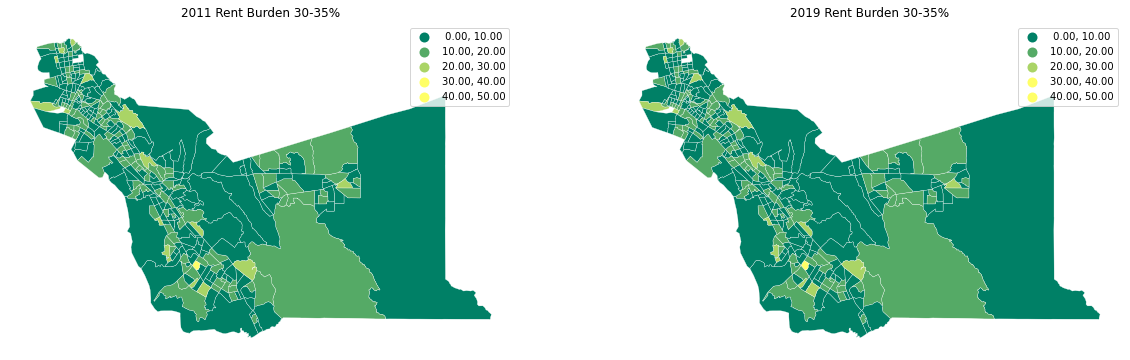

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(20, 15), sharex=True, sharey=True)
ax1, ax2 = axs
rb_comp.plot(column='30 - 34.9%_2019_Percentage',
             cmap='summer',
            scheme='user_defined',
            classification_kwds={'bins':[10,20,30,40,50]},
            edgecolor='white', 
            linewidth=0.3, 
            ax=ax1, 
            legend=True
           )
ax1.axis("off")
ax1.set_title("2011 Rent Burden 30-35%")

rb_comp.plot(column='30 - 34.9%_2019_Percentage',
             cmap='summer',
             scheme='user_defined',
            classification_kwds={'bins':[10,20,30,40,50]},
            edgecolor='white', 
            linewidth=0.3, 
            ax=ax2, 
            legend=True
           )
ax2.axis("off")
ax2.set_title("2019 Rent Burden 30-35%")

Text(0.5, 1.0, '2019 Rent Burden <10%')

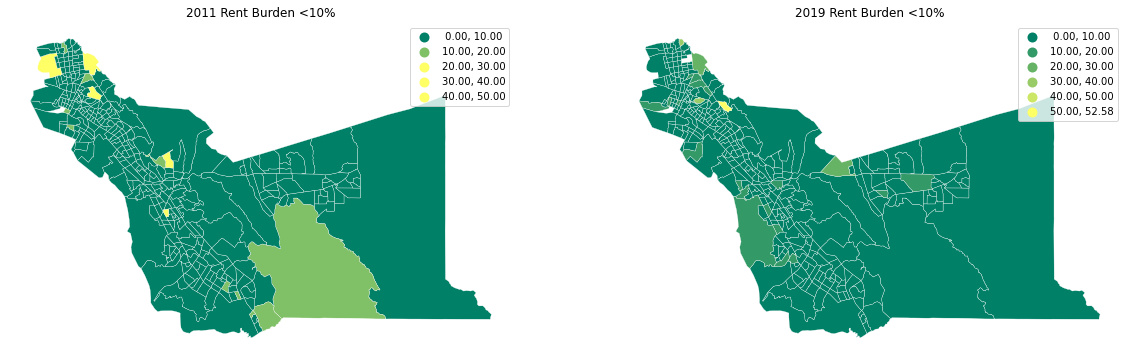

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(20, 15), sharex=True, sharey=True)
ax1, ax2 = axs
rb_comp.plot(column='<10%_2011Percentage',
             cmap='summer',
            scheme='user_defined',
            classification_kwds={'bins':[10,20,30,40,50]},
            edgecolor='white', 
            linewidth=0.3, 
            ax=ax1, 
            legend=True
           )
ax1.axis("off")
ax1.set_title("2011 Rent Burden <10%")

rb_comp.plot(column='<10%_2019_Percentage',
             cmap='summer',
             scheme='user_defined',
            classification_kwds={'bins':[10,20,30,40,50]},
            edgecolor='white', 
            linewidth=0.3, 
            ax=ax2, 
            legend=True
           )
ax2.axis("off")
ax2.set_title("2019 Rent Burden <10%")

It appears I was correct! It's also interesting to see that there has been significant improvement for these groups. While I haven't done a statistical analysis for the significance of these changes, just from a preliminary look at these different maps, it looks like there are still a considerable lot of people experiencing >50% rent burden in 2019. 

What I'm thinking of doing eventually is combining the columns so that the values are a bit larger. I'd also like to only focus on the census tracts that are near our transit stops. However, that is out of my current capabilites. 

I'm going to try to make a diverging bar chart with the percent change data. Hopefully that will produce a more meaningful chart. 

I'll just focus on the >50% category. Since the dataset is so large, I'll only want to include a dozen or so census tracts. I'll do 20 and hope for the best. I'll start by generating a random sample and then creating a variable with that random sample, and isolating the >50% category.

In [15]:
rb_pct.sample(20)

,GEO_ID,NAME_x,<10%_PercentChange,10 - 14.9%_PercentChange,15 - 19.9%_PercentChange,20 - 24.9%_PercentChange,25 - 29.9%_PercentChange,30 - 34.9%_PercentChange,35 - 39.9%_PercentChange,40 - 49.9%_PercentChange,50% or more_PercentChange,geometry
241,1400000US06001450607,"Census Tract 4506.07, Alameda County, California",-0.663071,0.048996,-0.460235,-0.014878,0.272548,0.310014,2.615429,-0.774602,0.517175,"POLYGON ((-121.87821 37.65595, -121.87851 37.6..."
11,1400000US06001422900,"Census Tract 4229, Alameda County, California",-0.571130,0.377557,0.927706,0.001492,1.752744,-0.094823,-0.740159,-0.024733,-0.108974,"POLYGON ((-122.26780 37.87218, -122.26762 37.8..."
48,1400000US06001427900,"Census Tract 4279, Alameda County, California",-0.377740,-0.796794,1.784523,1.363814,-0.109747,0.008808,-0.830801,0.490748,-0.131775,"POLYGON ((-122.26347 37.77095, -122.26347 37.7..."
81,1400000US06001451404,"Census Tract 4514.04, Alameda County, California",-1.000000,-0.538116,-0.659243,0.650603,0.679508,0.670432,-0.471187,1.234229,0.240501,"POLYGON ((-121.78881 37.67953, -121.78908 37.6..."
278,1400000US06001403800,"Census Tract 4038, Alameda County, California",7.571960,0.212677,-0.350374,-0.133120,-0.508282,0.069813,1.499114,-0.367694,1.205997,"POLYGON ((-122.24846 37.81044, -122.24860 37.8..."
43,1400000US06001450101,"Census Tract 4501.01, Alameda County, California",19.732543,-0.006241,-0.553178,0.420563,0.249506,0.002690,-0.573893,0.915507,0.084353,"POLYGON ((-121.89977 37.70575, -121.89925 37.7..."
126,1400000US06001401300,"Census Tract 4013, Alameda County, California",0.507874,0.673645,0.120762,0.400009,-0.231466,0.109165,0.075866,0.098159,-0.256959,"POLYGON ((-122.26613 37.82385, -122.26599 37.8..."
26,1400000US06001433800,"Census Tract 4338, Alameda County, California",-0.760203,-1.000000,0.302103,-0.559872,0.124605,0.860146,-0.575535,0.521786,0.470720,"POLYGON ((-122.12398 37.70148, -122.12369 37.7..."
271,1400000US06001450605,"Census Tract 4506.05, Alameda County, California",5.693320,-1.000000,-0.148123,-0.100130,-0.795345,4.033819,-0.432082,-0.214581,1.019264,"POLYGON ((-121.88547 37.66876, -121.88584 37.6..."
119,1400000US06001403701,"Census Tract 4037.01, Alameda County, California",0.617471,0.309786,-0.155620,-0.177489,0.347765,-0.248845,-0.514219,-0.665351,0.782237,"POLYGON ((-122.26149 37.81303, -122.26141 37.8..."


In [74]:
chart = rb_pct.sample(30)
chart.head()

,GEO_ID,NAME_x,<10%_PercentChange,10 - 14.9%_PercentChange,15 - 19.9%_PercentChange,20 - 24.9%_PercentChange,25 - 29.9%_PercentChange,30 - 34.9%_PercentChange,35 - 39.9%_PercentChange,40 - 49.9%_PercentChange,50% or more_PercentChange,geometry
19,1400000US06001440308,"Census Tract 4403.08, Alameda County, California",-0.665827,4.182258,-0.086022,0.419615,-0.713151,-0.627616,0.439516,9.200000,0.450851,"POLYGON ((-122.03263 37.58551, -122.03266 37.5..."
189,1400000US06001450602,"Census Tract 4506.02, Alameda County, California",-0.229205,-0.080096,0.391325,0.043398,-0.333600,0.964816,-0.543882,1.621818,-0.457257,"POLYGON ((-121.88458 37.63987, -121.88576 37.6..."
277,1400000US06001400300,"Census Tract 4003, Alameda County, California",0.364998,0.583611,-0.210460,-0.193071,-0.222470,0.087189,4.611373,-1.000000,-0.352348,"POLYGON ((-122.26124 37.84158, -122.26089 37.8..."
342,1400000US06001409300,"Census Tract 4093, Alameda County, California",0.535795,-0.622627,-0.171875,0.055859,-0.421033,0.183466,-0.877692,0.714219,0.024516,"POLYGON ((-122.17768 37.74083, -122.17761 37.7..."
321,1400000US06001403400,"Census Tract 4034, Alameda County, California",-0.109239,0.415841,0.409286,0.494839,-0.170880,-0.275476,0.352714,2.136004,-0.484428,"POLYGON ((-122.26430 37.80593, -122.26454 37.8..."


In [75]:
chart.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 30 entries, 19 to 179
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   GEO_ID                     30 non-null     object  
 1   NAME_x                     30 non-null     object  
 2   <10%_PercentChange         30 non-null     float64 
 3   10 - 14.9%_PercentChange   30 non-null     float64 
 4   15 - 19.9%_PercentChange   30 non-null     float64 
 5   20 - 24.9%_PercentChange   30 non-null     float64 
 6   25 - 29.9%_PercentChange   30 non-null     float64 
 7   30 - 34.9%_PercentChange   30 non-null     float64 
 8   35 - 39.9%_PercentChange   30 non-null     float64 
 9   40 - 49.9%_PercentChange   30 non-null     float64 
 10  50% or more_PercentChange  30 non-null     float64 
 11  geometry                   30 non-null     geometry
dtypes: float64(9), geometry(1), object(2)
memory usage: 3.0+ KB


In [76]:
list(chart)

['GEO_ID',
 'NAME_x',
 '<10%_PercentChange',
 '10 - 14.9%_PercentChange',
 '15 - 19.9%_PercentChange',
 '20 - 24.9%_PercentChange',
 '25 - 29.9%_PercentChange',
 '30 - 34.9%_PercentChange',
 '35 - 39.9%_PercentChange',
 '40 - 49.9%_PercentChange',
 '50% or more_PercentChange',
 'geometry']

In [77]:
keep = ['GEO_ID',
        'NAME_x',
        '50% or more_PercentChange',]

In [78]:
chart = chart[keep]
chart.head()

,GEO_ID,NAME_x,50% or more_PercentChange
19,1400000US06001440308,"Census Tract 4403.08, Alameda County, California",0.450851
189,1400000US06001450602,"Census Tract 4506.02, Alameda County, California",-0.457257
277,1400000US06001400300,"Census Tract 4003, Alameda County, California",-0.352348
342,1400000US06001409300,"Census Tract 4093, Alameda County, California",0.024516
321,1400000US06001403400,"Census Tract 4034, Alameda County, California",-0.484428


In [79]:
chart.columns.to_list()

['GEO_ID', 'NAME_x', '50% or more_PercentChange']

In [80]:
chart.columns = ['GEO_ID', 'Name', '50_or_more']

In [81]:
chart.head()

,GEO_ID,Name,50_or_more
19,1400000US06001440308,"Census Tract 4403.08, Alameda County, California",0.450851
189,1400000US06001450602,"Census Tract 4506.02, Alameda County, California",-0.457257
277,1400000US06001400300,"Census Tract 4003, Alameda County, California",-0.352348
342,1400000US06001409300,"Census Tract 4093, Alameda County, California",0.024516
321,1400000US06001403400,"Census Tract 4034, Alameda County, California",-0.484428


Now I'm going to make it so that values greater than 0 and colored green and values lower than 0 are colored red. Then I'll sort the values from lowest to highest

In [82]:
for i in range(20):
    chart['colors'] = ['red' if float(
        x) < 0 else 'green' for x in chart['50_or_more']]
  

In [83]:
chart.sort_values('50_or_more', inplace=True)

Now I need to reset the index.

In [84]:
chart.reset_index(inplace=True)

In [85]:
chart['50_or_more'].describe()

count    30.000000
mean      0.003606
std       0.464056
min      -0.512701
25%      -0.319624
50%      -0.108981
75%       0.198543
max       1.551515
Name: 50_or_more, dtype: float64

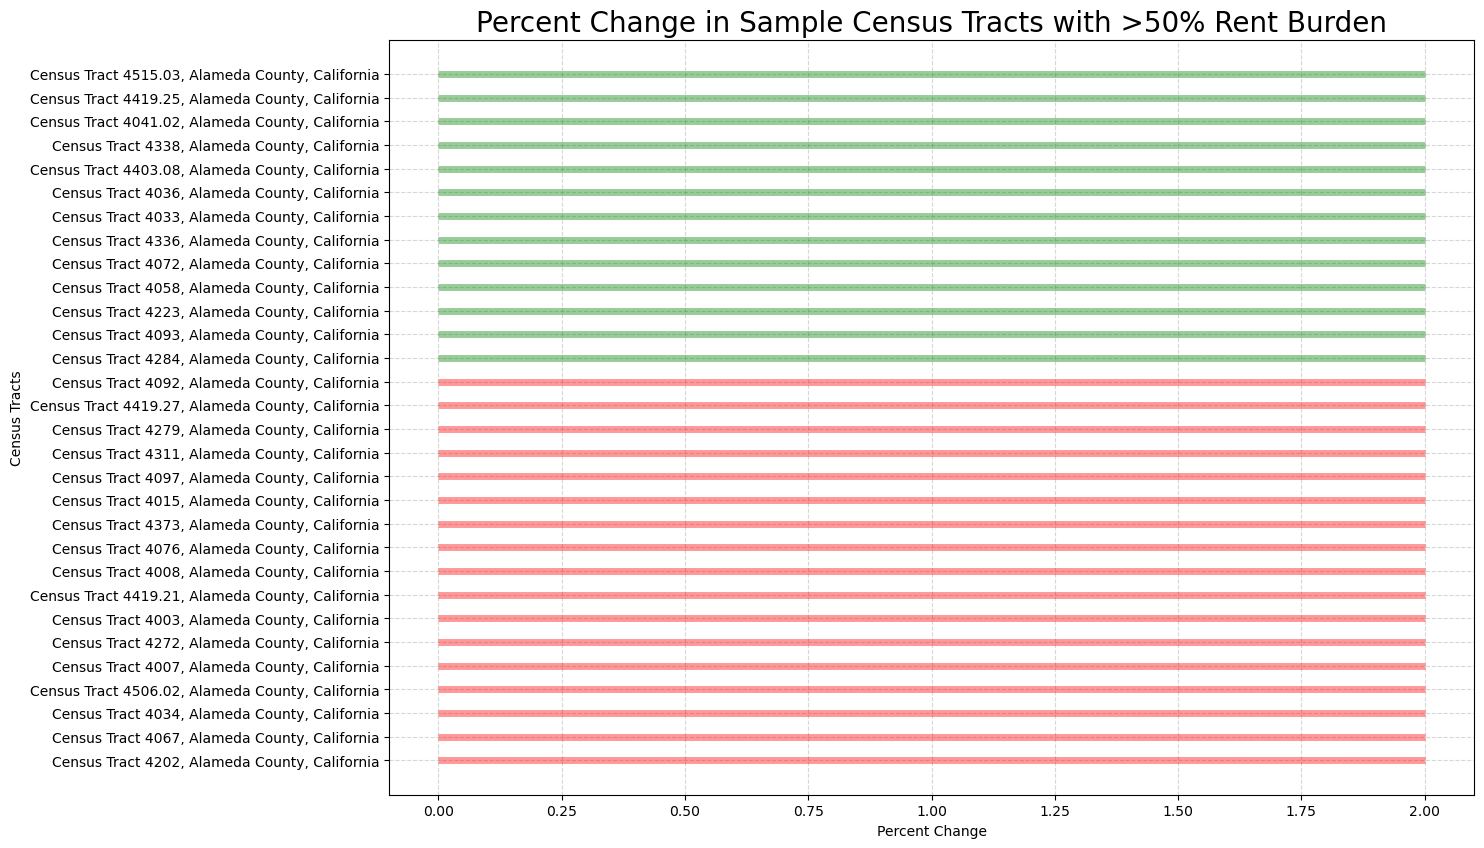

In [86]:
plt.figure(figsize=(14, 10), dpi=100)

#now I'm plotting the horizontal lines
plt.hlines(y=chart.index, xmin=0, xmax=2,
           color=chart.colors, alpha=0.4, linewidth=5)

plt.gca().set(ylabel='Census Tracts', xlabel='Percent Change')

plt.yticks(chart.index, chart.Name, fontsize=10)

plt.title('Percent Change in Sample Census Tracts with >50% Rent Burden', fontdict={
          'size': 20})

plt.grid(linestyle='--', alpha=0.5)

plt.show()

Okay that didn't go as planned. Let me try another way

In [87]:
chart.sample(10)

,index,GEO_ID,Name,50_or_more,colors
4,298,1400000US06001400700,"Census Tract 4007, Alameda County, California",-0.389035,red
0,129,1400000US06001420200,"Census Tract 4202, Alameda County, California",-0.512701,red
12,248,1400000US06001409700,"Census Tract 4097, Alameda County, California",-0.166297,red
3,189,1400000US06001450602,"Census Tract 4506.02, Alameda County, California",-0.457257,red
24,280,1400000US06001403600,"Census Tract 4036, Alameda County, California",0.397204,green
5,0,1400000US06001427200,"Census Tract 4272, Alameda County, California",-0.371223,red
19,179,1400000US06001422300,"Census Tract 4223, Alameda County, California",0.030275,green
17,50,1400000US06001428400,"Census Tract 4284, Alameda County, California",0.015293,green
2,321,1400000US06001403400,"Census Tract 4034, Alameda County, California",-0.484428,red
22,148,1400000US06001433600,"Census Tract 4336, Alameda County, California",0.202237,green


In [88]:
keep2 = ['GEO_ID',
         'Name',
         '50_or_more',
         'colors']

In [89]:
chart = chart[keep2]
chart.head()

,GEO_ID,Name,50_or_more,colors
0,1400000US06001420200,"Census Tract 4202, Alameda County, California",-0.512701,red
1,1400000US06001406700,"Census Tract 4067, Alameda County, California",-0.493163,red
2,1400000US06001403400,"Census Tract 4034, Alameda County, California",-0.484428,red
3,1400000US06001450602,"Census Tract 4506.02, Alameda County, California",-0.457257,red
4,1400000US06001400700,"Census Tract 4007, Alameda County, California",-0.389035,red


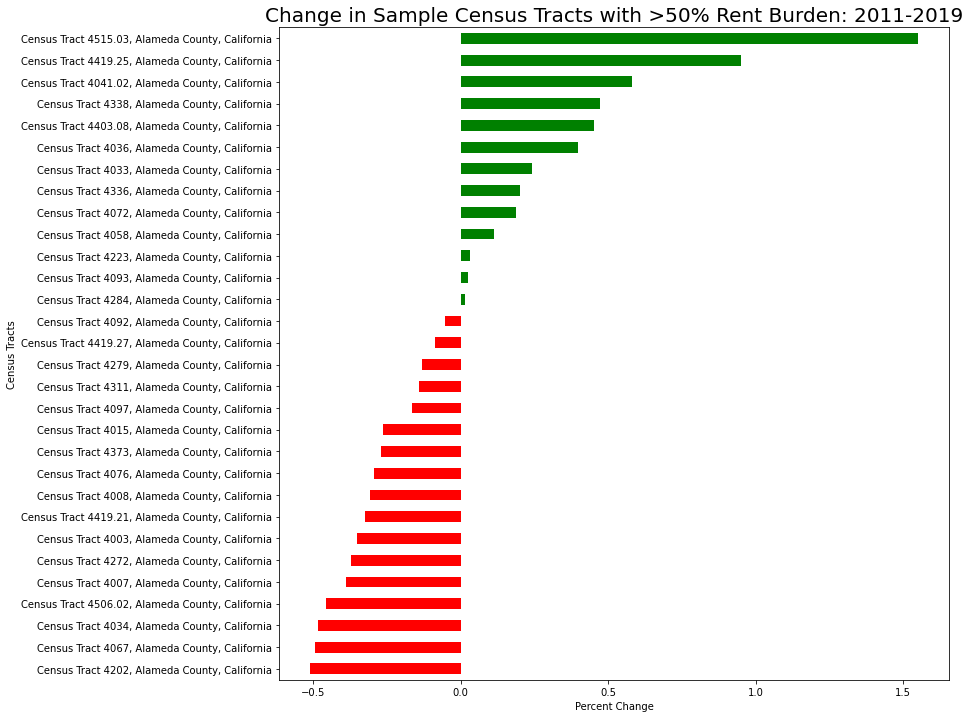

In [93]:
fig, ax = plt.subplots(figsize=(12,12))
chart['50_or_more'].plot.barh(ax=ax,
                              x='50_or_more',
                              y='GEO_ID',
                              legend=False,
                              color=chart.colors)

plt.gca().set(ylabel='Census Tracts', xlabel='Percent Change')

plt.yticks(chart.index, chart.Name, fontsize=10)

plt.title('Change in Sample Census Tracts with >50% Rent Burden: 2011-2019', fontdict={
          'size': 20})

plt.show()

I'm so happy it worked! 

### Division of work:

Nicole: Worked on obtaining, cleaning, sythnesizing, and analyzing the rent burden data. She also created an assortment of maps and some charts. She also worked on creating a database for the five BART stations of focus which they will use for later assignments.

Chaithra: Worked on obtaining, cleaning, sythesizing, and analyzing the ethnicity data. She created an assortment of maps and charts and also an interactive map. She has done particularly impressive things with her data analysis process and is a great problem solver. 

Together they have discussed best corses of action, created a plan for what they want to accomplish with the project, and have worked together very efficiently and effectively. 